Universidad Galileo  
Maestría en Data Science  
Statistical Learning I
Sección U  


   # **Tarea 2: Parte 2 - Modelo polinomial de calidad de vinos**


<p style="text-align: right;">
Henry Giovanni<br/>
Barrientos García<br/>
21001538<br/>
Guatemala, 06 de junio de 2022<br/>
</p>

## Descripción

Es permitido utilizar [sklearn.preprocessing.polynomialfeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)


### Instrucciones

1. Seleccionar y transformar(generando las combinaciones polinomiales para un polinomio de grado dos o tres a elección) las features que considere que son las mejores para predecir la calidad del vino, utilizar como minimo 2 features. Para seleccionar las features, hacer un analisis exploratorio por ejemplo(pero no limitado a ):  graficando y viendo la forma en que se comportan los datos.

 Por ejemplo, se tienen las features "a" y "b" y seleccionamos polinomio de grado 2, hacemos feature engineering para obtener :
 
 $[a,b,a^{2},b^{2},ab]$
 
 No olvidar el "bias" (parámetro multiplicado por 1) ,con lo cual el dataset puede quedar con las columnas:
 
 $[1,a,b,a^{2},b^{2},ab]$
 
2. Una vez transformada la data aplicar regresion lineal con las features polinomiales usando Tensorflow.

Requisitos adicionales:
* Se debe agregar al notebook un screenshot del grafo de tensorboard, simplificando(usando  names , y name_scope como visto en clase).

* Se debe generar un directorio de logs de tensorboard para cada corrida/experimento , con cada directorio identificando facilmente la configuración del experimento como visto en clase, por ejemplo para un experimento con learning rate = 0.1 , y polinomio grado 2  crear un directorio: lr=0.1_polinomio_grado=2. (Agregar al notebook un screenshot de estas gráficas)

* Concluir en markdown cual es el mejor modelo para este caso basado en la comparativa entre curvas de costo/error en tensorboard.


### Red Wine Quality Data

Se aplicará regresión para crear un modelo de la calidad de vino en función de características del mismo, siendo 1 el peor vino y 10 el mejor.

Variables de entrada:

1. fixed acidity 
2. volatile acidity 
3. citric acid 
4. residual sugar 
5. chlorides 
6. free sulfur dioxide 
7. total sulfur dioxide 
8. density 
9. pH 
10. sulphates 
11. alcohol 

**Variable a predecir:**

12. quality (puntuacion  entre 0 y 10) 


In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import tensorflow.compat.v1 as tf
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
%load_ext tensorboard
tf.disable_v2_behavior()
tf.compat.v1.disable_eager_execution()

Instructions for updating:
non-resource variables are not supported in the long term


AttributeError: module 'tensorflow._api.v1.compat.v1.compat' has no attribute 'v1'

In [2]:
# Lectura y analisis de datos
data = pd.read_csv('data/winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Análisis exploratorio de los datos

In [3]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### Gráficas de distribución de las variables

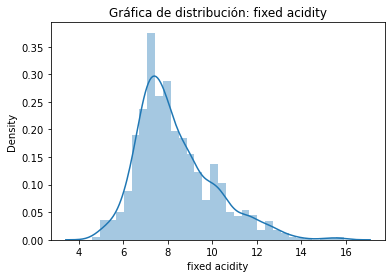

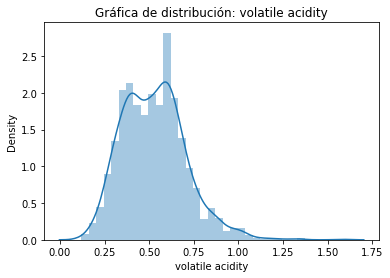

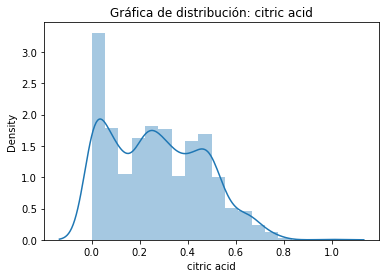

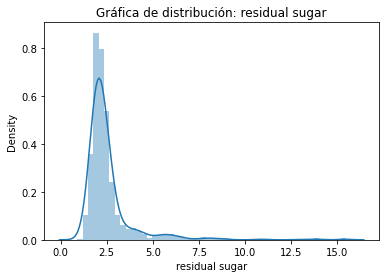

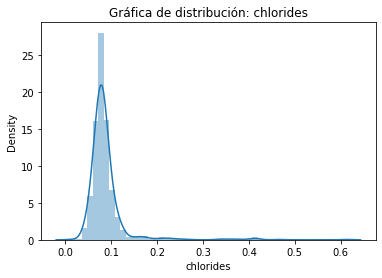

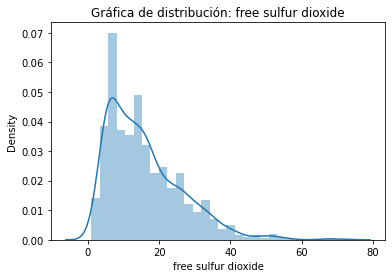

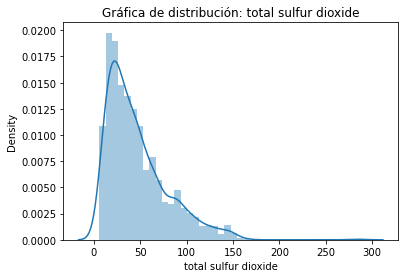

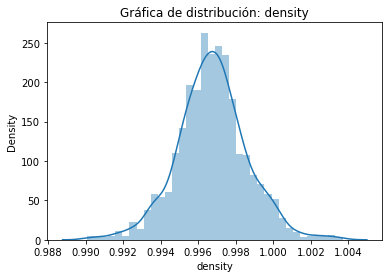

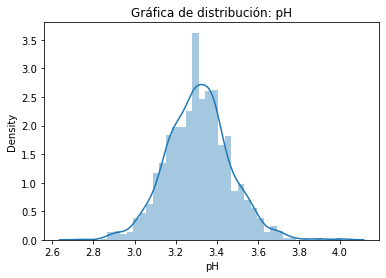

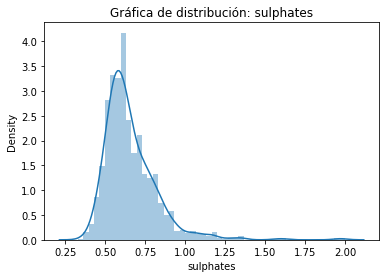

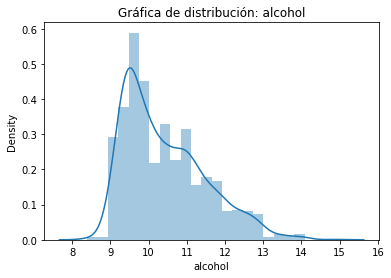

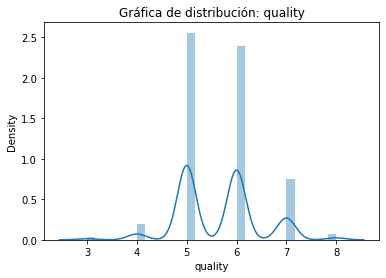

In [4]:
for k in range(0, len(data.columns)):
    plotNombre = "Gráfica de distribución: " + str(data.columns[k])
    sns.distplot(data[data.columns[k]]).set_title(plotNombre)
    plt.show()

### Observaciones

- Basados en las gráficas de distribución de cada variable observamos que la mayoría de variables independientes tienen una distribución normal, algunas con sesgo hacia la izquierda.

- La variable dependiente **quality** tiene su propia distribución, dato que es discreta categórica.

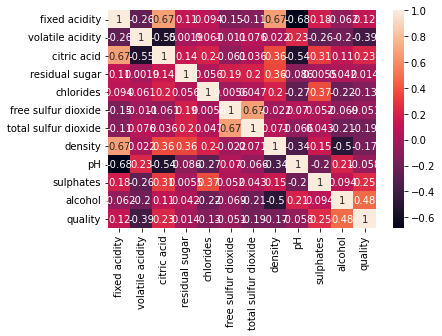

In [5]:
# Revisión de matriz de correlación
MatrixCorrelacion = data.corr()
sns.heatmap(MatrixCorrelacion, annot=True)
plt.show()

Con base en la matriz del párrafo anterior, eliminamos las que tienen correlación con valor 0 para volver a corroborar datos.

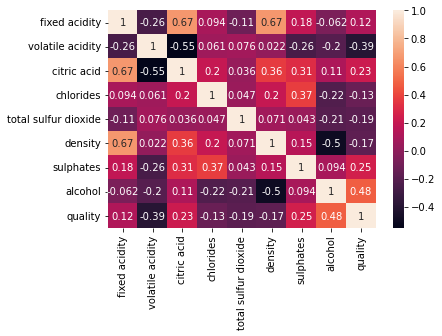

In [6]:
data = data.drop(columns = ['residual sugar', 'free sulfur dioxide', 'pH'])
MatrixCorrelacion = data.corr()
sns.heatmap(MatrixCorrelacion, annot=True)
plt.show()

**Nota:** 
Con base en la matriz de correlación determinamos que las variables con mayor correlación y con mejores características para obtener una correlación son: **alcohol, sulphates y volatile acidity**.

## Modelo de regresión polinomial con Tensorflow

Para la realización del modelo polinomial, utilizaremos Gradient descent.

In [7]:
# Dividimos datos para entrenamiento y pruebas
data = data.sample(frac = 1)
index = int(0.8 * len(data))
df_train = data[:index]
df_test = data[:-index]

In [8]:
# MRP = modelo de regresión polinomial
class MRP:
    
    def __init__ (self, Nvariables):
        self.parametros = tf.get_variable("parametros", dtype = tf.float32, shape = [1,Nvariables], initializer = tf.zeros_initializer())

    def MSE(self, x, y):
        error = 1/2 * tf.reduce_mean(tf.math.square(y - tf.matmul(self.parametros,x)))
        return error

    def gradient_descent(self, xt, yt, xtst, ytst, lr):
        mse_train = self.MSE(xt, yt)
        error_summary_train = tf.summary.scalar("mse_summary_train", mse_train)

        mse_test = self.MSE(xtst, ytst)
        error_summary_test = tf.summary.scalar("mse_summary_test", mse_test)
        
        gradient = tf.gradients(mse_train, [self.parametros])
        new_w = tf.assign(self.parametros, self.parametros -lr * gradient[0])
        return new_w, mse_train, mse_test, error_summary_train, error_summary_test

In [9]:
# Función para entrenamiento
def training_model_polinomial(var_train, y_train, var_test, y_test, grado, lr, epochs, printl):
    # String para experimento
    directory = './winelogs/'+ datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + "_lr="+str(lr) + "_epochs=" + str(epochs) + "_polydegree=" + str(grado)
    
    # Definición del modelo polinomial
    from sklearn.preprocessing import PolynomialFeatures
    xtrain = PolynomialFeatures(grado).fit_transform(var_train)
    xtest = PolynomialFeatures(grado).fit_transform(var_test)

    n_variables = xtrain.shape[1]
    n_rows = xtrain.shape[0]
    n_rowstest = xtest.shape[0]
   
    graph = tf.Graph()  
    with graph.as_default():
        # inputs
        t_xtrain = tf.placeholder(tf.float32, [n_variables, n_rows], "tr_xtrain")
        t_ytrain = tf.placeholder(tf.float32, [n_rows], "tr_ytrain")
        t_xtest = tf.placeholder(tf.float32, [n_variables, n_rowstest], "t_xtest")
        t_ytest = tf.placeholder(tf.float32, [n_rowstest], "t_ytest")
        
        mrp = MRP(n_variables)
        nuevos_parametros = mrp.gradient_descent(t_xtrain, t_ytrain, t_xtest, t_ytest, lr)
        # Log para tensorboard
        writer = tf.summary.FileWriter(directory, graph)
        
        with tf.train.MonitoredSession() as session:
            # Tensores input
            feed_dict = {t_xtrain:xtrain.T, t_ytrain:ytrain, t_xtest:xtest.T, t_ytest:ytest}
            
            # Ejecución de epochs + 1 veces del algoritmo
            for i in range(epochs + 1):
                # Entrenamiento
                entrenamiento = session.run(nuevos_parametros, feed_dict = feed_dict)
                if (i % printl == 0):
                    parametros = session.run(mrp.parametros, feed_dict = feed_dict)
                    # Para tensorboard
                    writer.add_summary(entrenamiento[3], i)
                    writer.add_summary(entrenamiento[4], i)
                    print("Epoch: ", i, "mse_train: ", entrenamiento[1], "mse_test: ", entrenamiento[2])
            return parametros, entrenamiento[1], entrenamiento[2]
        writer.close()

## Ejecución de experimentos

In [10]:
# Preparando X y Y para entrenar modelo
var_train = df_train[['sulphates','volatile acidity', 'alcohol']]
var_test= df_test[['sulphates','volatile acidity', 'alcohol']]
ytrain = df_train['quality']
ytest = df_test['quality']

### Grado 1

In [11]:
# Experimento 1 (grado 1)
training_model_polinomial(var_train, ytrain, var_test, ytest, 1, 0.1, 10, 1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Epoch:  0 mse_train:  16.179438 mse_test:  16.4875
Epoch:  1 mse_train:  1642.9695 mse_test:  1637.9529
Epoch:  2 mse_train:  169653.7 mse_test:  169526.17
Epoch:  3 mse_train:  17521372.0 mse_test:  17504250.0
Epoch:  4 mse_train:  1809562800.0 mse_test:  1807834800.0
Epoch:  5 mse_train:  186887180000.0 mse_test:  186708260000.0
Epoch:  6 mse_train:  19301233000000.0 mse_test:  19282761000000.0
Epoch:  7 mse_train:  1993383000000000.0 mse_test:  1991475400000000.0
Epoch:  8 mse_train:  2.0587154e+17 mse_test:  2.0567454e+17
Epoch:  9 mse_train:  2.1261892e+19 mse_test:  2.1241549e+19
Epoch:  10 mse_train:  2.1958747e+21 mse_test:  2.1937732e+21


(array([[6.0026829e+09, 3.9667635e+09, 3.1405412e+09, 6.3258808e+10]],
       dtype=float32),
 2.1958747e+21,
 2.1937732e+21)

In [12]:
# Experimento 2 (grado 1)
training_model_polinomial(var_train, ytrain, var_test, ytest, 1, 0.001, 10000, 1000)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Epoch:  0 mse_train:  16.179438 mse_test:  16.4875
Epoch:  1000 mse_train:  0.27135953 mse_test:  0.2566688
Epoch:  2000 mse_train:  0.26909754 mse_test:  0.25429887
Epoch:  3000 mse_train:  0.26697975 mse_test:  0.25206855
Epoch:  4000 mse_train:  0.2649959 mse_test:  0.24997039
Epoch:  5000 mse_train:  0.26313674 mse_test:  0.24799593
Epoch:  6000 mse_train:  0.26139352 mse_test:  0.24613476
Epoch:  7000 mse_train:  0.25975806 mse_test:  0.24438468
Epoch:  8000 mse_train:  0.25822306 mse_test:  0.24273291
Epoch:  9000 mse_train:  0.25678134 mse_test:  0.24117453
Epoch:  10000 mse_train:  0.25542656 mse_test:  0.2397037


(array([[ 0.22988592,  0.3444067 , -0.20180826,  0.5045409 ]],
       dtype=float32),
 0.25542656,
 0.2397037)

In [13]:
# Experimento 3 (grado 1)
training_model_polinomial(var_train, ytrain, var_test, ytest, 1, 0.0001, 10000, 1000)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Epoch:  0 mse_train:  16.179438 mse_test:  16.130953
Epoch:  1000 mse_train:  0.27352756 mse_test:  0.25894088
Epoch:  2000 mse_train:  0.27328017 mse_test:  0.2586788
Epoch:  3000 mse_train:  0.27303448 mse_test:  0.2584223
Epoch:  4000 mse_train:  0.27279034 mse_test:  0.25816745
Epoch:  5000 mse_train:  0.27254787 mse_test:  0.25791413
Epoch:  6000 mse_train:  0.272307 mse_test:  0.25766248
Epoch:  7000 mse_train:  0.27206776 mse_test:  0.2574123
Epoch:  8000 mse_train:  0.27183002 mse_test:  0.25716382
Epoch:  9000 mse_train:  0.271594 mse_test:  0.25691658
Epoch:  10000 mse_train:  0.2713595 mse_test:  0.2566713


(array([[ 6.8891473e-02,  6.9973506e-02, -3.8869196e-04,  5.2702665e-01]],
       dtype=float32),
 0.2713595,
 0.2566713)

### Grado 2

In [14]:
# Experimento 4 (grado 2)
training_model_polinomial(var_train, ytrain, var_test, ytest, 2, 0.1, 10, 1)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Epoch:  0 mse_train:  16.179438 mse_test:  16.4875
Epoch:  1 mse_train:  25616726.0 mse_test:  25542854.0
Epoch:  2 mse_train:  42039698000000.0 mse_test:  41919216000000.0
Epoch:  3 mse_train:  6.8991505e+19 mse_test:  6.8793777e+19
Epoch:  4 mse_train:  1.1322225e+26 mse_test:  1.12897745e+26
Epoch:  5 mse_train:  1.858095e+32 mse_test:  1.8527697e+32
Epoch:  6 mse_train:  inf mse_test:  inf
Epoch:  7 mse_train:  inf mse_test:  inf
Epoch:  8 mse_train:  inf mse_test:  inf
Epoch:  9 mse_train:  inf mse_test:  inf
Epoch:  10 mse_train:  inf mse_test:  inf


(array([[6.5024505e+30, 4.3057839e+30, 3.3749114e+30, 6.9290154e+31,
         3.0377184e+30, 2.1833397e+30, 4.5980435e+31, 1.9688454e+30,
         3.5657025e+31, 7.4697480e+32]], dtype=float32),
 inf,
 inf)

In [15]:
# Experimento 5 (grado 2)
training_model_polinomial(var_train, ytrain, var_test, ytest, 2, 0.001, 100, 10)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Epoch:  0 mse_train:  16.179438 mse_test:  1756.0217
Epoch:  10 mse_train:  4.4273758e+22 mse_test:  4.414687e+22
Epoch:  20 mse_train:  inf mse_test:  inf
Epoch:  30 mse_train:  inf mse_test:  inf
Epoch:  40 mse_train:  nan mse_test:  nan
Epoch:  50 mse_train:  nan mse_test:  nan
Epoch:  60 mse_train:  nan mse_test:  nan
Epoch:  70 mse_train:  nan mse_test:  nan
Epoch:  80 mse_train:  nan mse_test:  nan
Epoch:  90 mse_train:  nan mse_test:  nan
Epoch:  100 mse_train:  nan mse_test:  nan


(array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]], dtype=float32),
 nan,
 nan)

In [16]:
# Experimento 6 (grado 2)
training_model_polinomial(var_train, ytrain, var_test, ytest, 2, 0.0001, 100000, 10000)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Epoch:  0 mse_train:  16.179438 mse_test:  16.4875
Epoch:  10000 mse_train:  0.26299396 mse_test:  0.24340513
Epoch:  20000 mse_train:  0.2285628 mse_test:  0.20891556
Epoch:  30000 mse_train:  0.22080511 mse_test:  0.20146795
Epoch:  40000 mse_train:  0.21898346 mse_test:  0.19984281
Epoch:  50000 mse_train:  0.21848705 mse_test:  0.1994681
Epoch:  60000 mse_train:  0.21828778 mse_test:  0.19935165
Epoch:  70000 mse_train:  0.21815637 mse_test:  0.19928396
Epoch:  80000 mse_train:  0.21804163 mse_test:  0.19922331
Epoch:  90000 mse_train:  0.21793222 mse_test:  0.1991629
Epoch:  100000 mse_train:  0.21782555 mse_test:  0.19910447


(array([[ 0.13721342,  0.0381697 ,  0.02380129,  0.74920404, -0.11215217,
         -0.01483655,  0.08258437, -0.02770946, -0.11399813, -0.02037724]],
       dtype=float32),
 0.21782555,
 0.19910447)

### Grado 3

In [17]:
# Experimento 7 (grado 3)
training_model_polinomial(var_train, ytrain, var_test, ytest, 3, 0.1, 10, 1)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Epoch:  0 mse_train:  16.179438 mse_test:  16.4875
Epoch:  1 mse_train:  356359770000.0 mse_test:  353798030000.0
Epoch:  2 mse_train:  8.502451e+21 mse_test:  8.4413253e+21
Epoch:  3 mse_train:  2.0286156e+32 mse_test:  2.0140315e+32
Epoch:  4 mse_train:  inf mse_test:  inf
Epoch:  5 mse_train:  inf mse_test:  inf
Epoch:  6 mse_train:  inf mse_test:  inf
Epoch:  7 mse_train:  inf mse_test:  inf
Epoch:  8 mse_train:  inf mse_test:  inf
Epoch:  9 mse_train:  nan mse_test:  nan
Epoch:  10 mse_train:  nan mse_test:  nan


(array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan]], dtype=float32),
 nan,
 nan)

In [18]:
# Experimento 8 (grado 3)
training_model_polinomial(var_train, ytrain, var_test, ytest, 3, 0.001, 100, 10)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Epoch:  0 mse_train:  16.179438 mse_test:  16.4875
Epoch:  10 mse_train:  inf mse_test:  inf
Epoch:  20 mse_train:  nan mse_test:  nan
Epoch:  30 mse_train:  nan mse_test:  nan
Epoch:  40 mse_train:  nan mse_test:  nan
Epoch:  50 mse_train:  nan mse_test:  nan
Epoch:  60 mse_train:  nan mse_test:  nan
Epoch:  70 mse_train:  nan mse_test:  nan
Epoch:  80 mse_train:  nan mse_test:  nan
Epoch:  90 mse_train:  nan mse_test:  nan
Epoch:  100 mse_train:  nan mse_test:  nan


(array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan]], dtype=float32),
 nan,
 nan)

In [19]:
# Experimento 9 (grado 3)
training_model_polinomial(var_train, ytrain, var_test, ytest, 3, 0.0001, 20000, 2000)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Epoch:  0 mse_train:  16.179438 mse_test:  16.4875
Epoch:  2000 mse_train:  nan mse_test:  nan
Epoch:  4000 mse_train:  nan mse_test:  nan
Epoch:  6000 mse_train:  nan mse_test:  nan
Epoch:  8000 mse_train:  nan mse_test:  nan
Epoch:  10000 mse_train:  nan mse_test:  nan
Epoch:  12000 mse_train:  nan mse_test:  nan
Epoch:  14000 mse_train:  nan mse_test:  nan
Epoch:  16000 mse_train:  nan mse_test:  nan
Epoch:  18000 mse_train:  nan mse_test:  nan
Epoch:  20000 mse_train:  nan mse_test:  nan


(array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan]], dtype=float32),
 nan,
 nan)

In [20]:
# Experimento 10 (grado 3)
training_model_polinomial(var_train, ytrain, var_test, ytest, 3, 0.00001, 20000, 2000)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Epoch:  0 mse_train:  16.179438 mse_test:  16.4875
Epoch:  2000 mse_train:  nan mse_test:  nan
Epoch:  4000 mse_train:  nan mse_test:  nan
Epoch:  6000 mse_train:  nan mse_test:  nan
Epoch:  8000 mse_train:  nan mse_test:  nan
Epoch:  10000 mse_train:  nan mse_test:  nan
Epoch:  12000 mse_train:  nan mse_test:  nan
Epoch:  14000 mse_train:  nan mse_test:  nan
Epoch:  16000 mse_train:  nan mse_test:  nan
Epoch:  18000 mse_train:  nan mse_test:  nan
Epoch:  20000 mse_train:  nan mse_test:  nan


(array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan]], dtype=float32),
 nan,
 nan)

In [21]:
%tensorboard --logdir ./winelogs

Reusing TensorBoard on port 6006 (pid 20268), started 4:17:38 ago. (Use '!kill 20268' to kill it.)

### Conclusiones:

1. De las variables elegidas inicialmente las más significativas que tienen capacidad de explicar la calidad del vino son **'sulphates','volatile acidity', 'alcohol'**

2. Luego de la realización de 9 experimentos con modelo de 3 variables y grados 1, 2 y 3 respectivamente. Se obtuvieron los resultados siguientes:
- Grado 1: error = 0.2719291,  lr = 0.001,   epochs = 10000
- Grado 2. error = 0.22193031, lr = 0.00001, epochs = 100000
- Grado 3: no convergió

3. De los modelos ejecutados el sugerido con base al error sobre el conjunto de datos de prueba es el de **Grado 2 con 3 variables, un lr = 0.00001 y epochs = 100000**.

4. Es posible que exista otro modelo que tenga mejores valores de predicción pero por temas de experimentos y tiempo se llegó a probar hasta grado 3.